In [12]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path = '/content/drive/My Drive/DL_Assign_2/data/Task2/Test'
data_dir_list = sorted(os.listdir(data_path))
print(data_dir_list)

['image', 'mask']


In [8]:
def load_images(directory):
  patient_dir_list = sorted(os.listdir(directory + '/image'))
  print(patient_dir_list)

  img_array = []
  mask_array = []

  for pat in patient_dir_list :
    count = 0
    print('Loading images of Patient : ',pat)
    for file in os.listdir(directory+'/image/'+pat):
      image_path = directory+'/image/'+pat+'/'+ file
      image = cv2.imread(image_path)
      image = np.array(image)
      image_resize = cv2.resize(image,(128,128))
      img_array.append(image_resize)
      #print('Image of input :',file)
      #plt.imshow(image_resize, cmap = 'gray')
      #plt.show()
      mask_name = file.replace('X','Y',1)
      mask_path = directory+'/mask/'+pat+'/'+ mask_name
      mask = cv2.imread(mask_path)
      mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
      mask = np.array(mask)
      mask = cv2.resize(mask,(128,128))
      (thresh, mask_bw) = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
      mask_array.append(mask_bw)
      #print('Image of mask :',mask_name)
      count = count + 1
      #plt.imshow(mask_resize, cmap = 'gray')
      #plt.show()
    print(count)
  return np.array(img_array), np.array(mask_array) 

In [9]:
train_dir = '/content/drive/My Drive/DL_Assign_2/data/Task2/Train'
x_train, y_train = load_images(train_dir)

['Pat1', 'Pat10', 'Pat2', 'Pat3', 'Pat4', 'Pat5', 'Pat6', 'Pat7', 'Pat8', 'Pat9']
Loading images of Patient :  Pat1
130
Loading images of Patient :  Pat10
120
Loading images of Patient :  Pat2
110
Loading images of Patient :  Pat3
120
Loading images of Patient :  Pat4
130
Loading images of Patient :  Pat5
100
Loading images of Patient :  Pat6
120
Loading images of Patient :  Pat7
120
Loading images of Patient :  Pat8
120
Loading images of Patient :  Pat9
90


In [10]:
print(x_train.shape)
print(y_train.shape)

(1160, 128, 128, 3)
(1160, 128, 128)


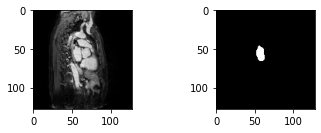

In [15]:
i = 100
plt.subplot(221).imshow(x_train[i],cmap='gray')
plt.subplot(222).imshow(y_train[i],cmap='gray')

In [16]:
np.unique(y_train)

array([  0, 255], dtype=uint8)

In [17]:
valid_dir = '/content/drive/My Drive/DL_Assign_2/data/Task2/Valid'
x_valid, y_valid = load_images(valid_dir)

['Pat16', 'Pat17', 'Pat18', 'Pat19', 'Pat20']
Loading images of Patient :  Pat16
110
Loading images of Patient :  Pat17
120
Loading images of Patient :  Pat18
120
Loading images of Patient :  Pat19
109
Loading images of Patient :  Pat20
110


In [18]:
print(x_valid.shape)
print(y_valid.shape)

(569, 128, 128, 3)
(569, 128, 128)


In [19]:
test_dir = '/content/drive/My Drive/DL_Assign_2/data/Task2/Test'
x_test, y_test = load_images(test_dir)

['Pat11', 'Pat12', 'Pat13', 'Pat14', 'Pat15']
Loading images of Patient :  Pat11
122
Loading images of Patient :  Pat12
100
Loading images of Patient :  Pat13
110
Loading images of Patient :  Pat14
100
Loading images of Patient :  Pat15
110


In [20]:
print(x_test.shape)
print(y_test.shape)

(542, 128, 128, 3)
(542, 128, 128)


In [21]:
np.save('/content/drive/My Drive/DL_Assign_2/data/x_train_2', x_train)
np.save('/content/drive/My Drive/DL_Assign_2/data/y_train_2', y_train)

np.save('/content/drive/My Drive/DL_Assign_2/data/x_test_2', x_test)
np.save('/content/drive/My Drive/DL_Assign_2/data/y_test_2', y_test)

np.save('/content/drive/My Drive/DL_Assign_2/data/x_valid_2', x_valid)
np.save('/content/drive/My Drive/DL_Assign_2/data/y_valid_2', y_valid)

(128, 128)


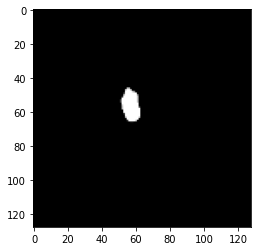

In [ ]:
msk = y_train[100]
print(msk.shape)
plt.imshow(msk,cmap ='gray')

In [ ]:
msk = np.reshape(msk,(128,128,1))
print(msk.shape)

(128, 128, 1)


(128, 128)


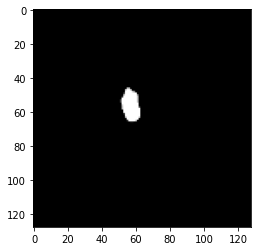

In [ ]:
msk = np.reshape(msk,(128,128))
print(msk.shape)
plt.imshow(msk,cmap ='gray')

In [ ]:
(thresh, msk_bw) = cv2.threshold(msk, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

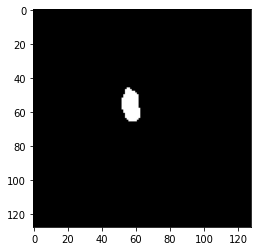

In [ ]:
plt.imshow(msk_bw,cmap ='gray')

In [ ]:
np.unique(msk_bw)

array([  0, 255], dtype=uint8)